In [1]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot 

##########################
#http0.1://salib.readthedocs.io/en/latest/basics_with_interface.html
##########################



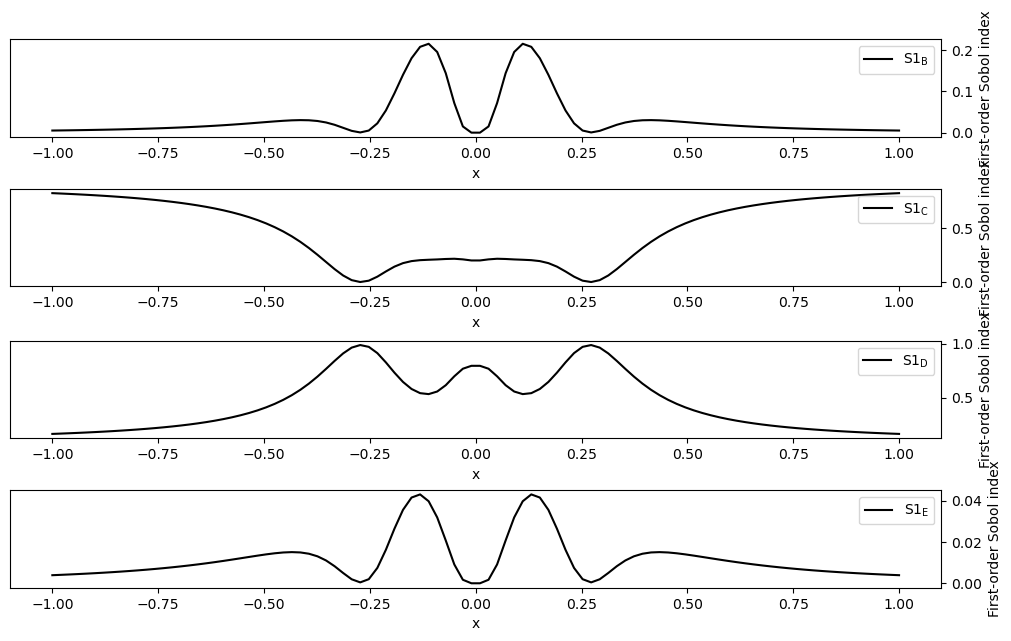

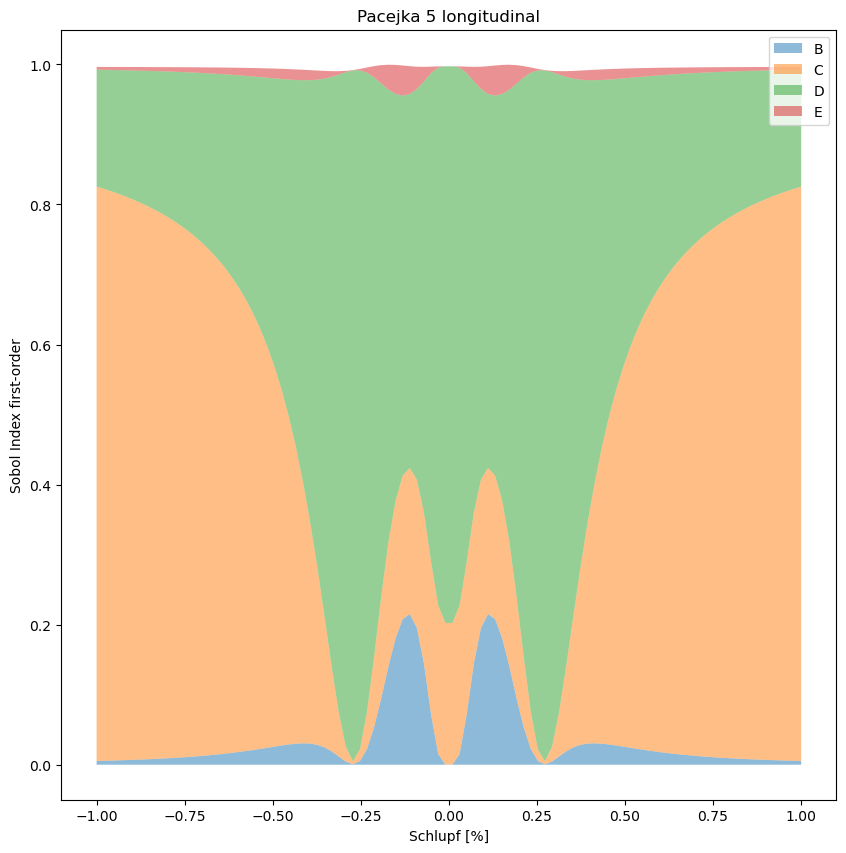

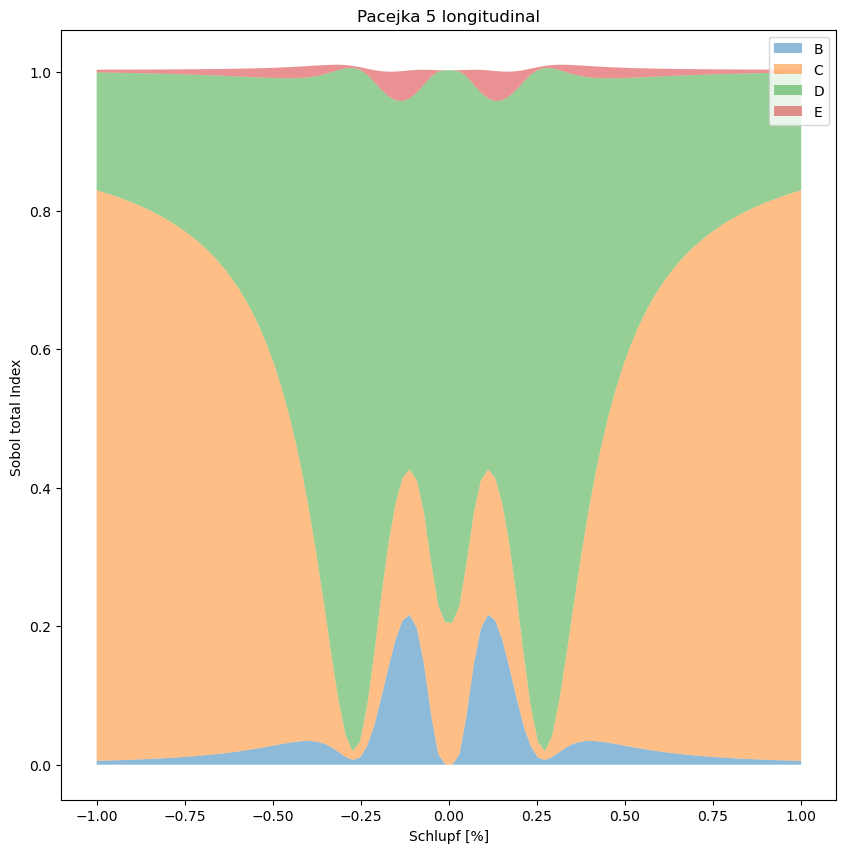

[0.03821904 0.47774968 0.46743834 0.01185332]
[0.03999389 0.48251438 0.46991087 0.01261322]


In [6]:
#same SA for Pacejka5 longitudenal

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

import Pacejka_Params_Indy as pa

#function
def Pacejka5_long_fit(SL,B,C,D,E):

    Fx= D * np.sin(C * np.arctan(D * SL - E * (B*SL - np.arctan(B * SL)))) 
    
    return Fx
params_SA_Fx = [-9.06434405,  1.60162373, -1.72069169, -0.80265574]
s=0.1
sp = ProblemSpec( {
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[-9.06434405*(1+s),-9.06434405*(1-s)], [1.60162373*(1-s), 1.60162373*(1+s)], [-1.72069169*(1+s), -1.72069169*(1-s)], [-0.80265574 * (1+s), -0.80265574*(1-s)]],

})

SL = np.linspace(-1,1,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SL=SL):
    y = np.zeros((ab.shape[0], SL.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_long_fit(SL,B,C,D,E)

    return y

(
sp.sample_sobol(2**10)
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])
STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')
    
#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(10,10))
plt.fill_between(SL,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(SL,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 longitudinal')
plt.legend(loc='upper right')
plt.show()


STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(10,10))
plt.fill_between(SL,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(SL,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 longitudinal')
plt.legend(loc='upper right')
plt.show()


#Mean of Sensitvity indexes of first order index
# for ranking parameters on influence on the model output (direkter Einfluss auf die Ausgangsgröße)

S1_mean = np.zeros(4)
i=0
for i in range(0,4):
    S1_mean[i] = np.mean(S1s[:,i])


#Mean of Sensitvity indexes of total index
# includes first and all higher order index (berücksichtig Wechselwirkungseffekte zwischen den Parametern, wichtig für nicht-lineare Modelle)
ST_mean = np.zeros(4)
i=0
for i in range(0,4):
    ST_mean[i] = np.mean(STs[:,i])

print(S1_mean)
print(ST_mean)


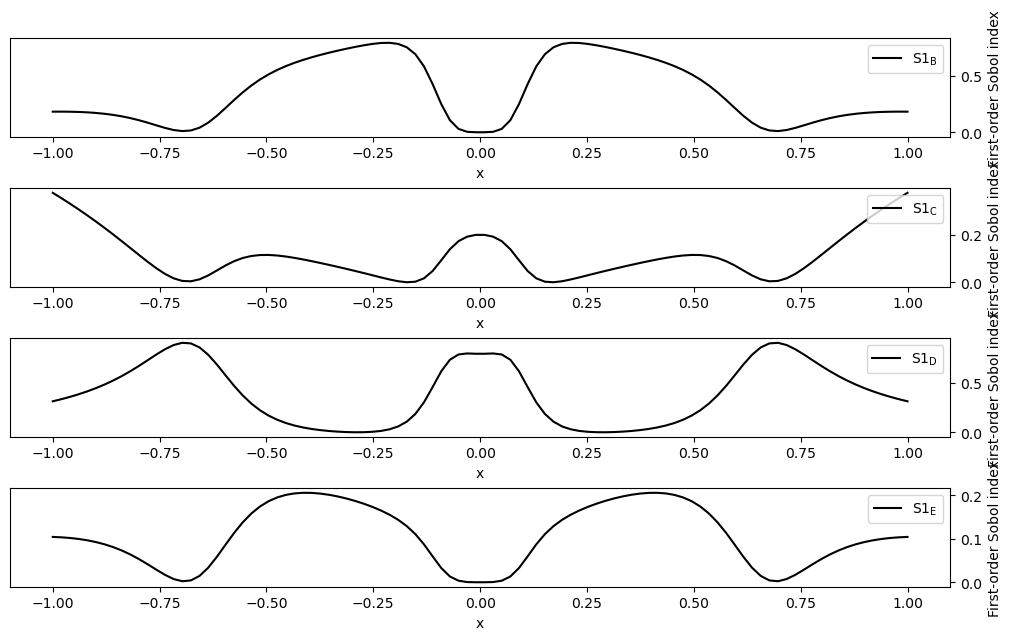

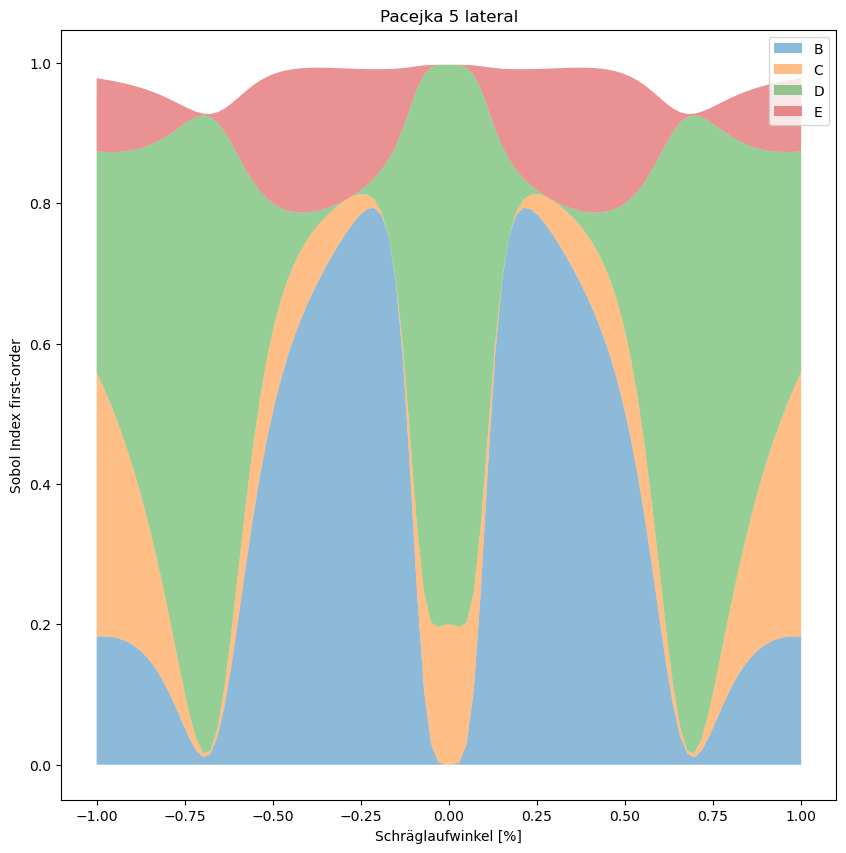

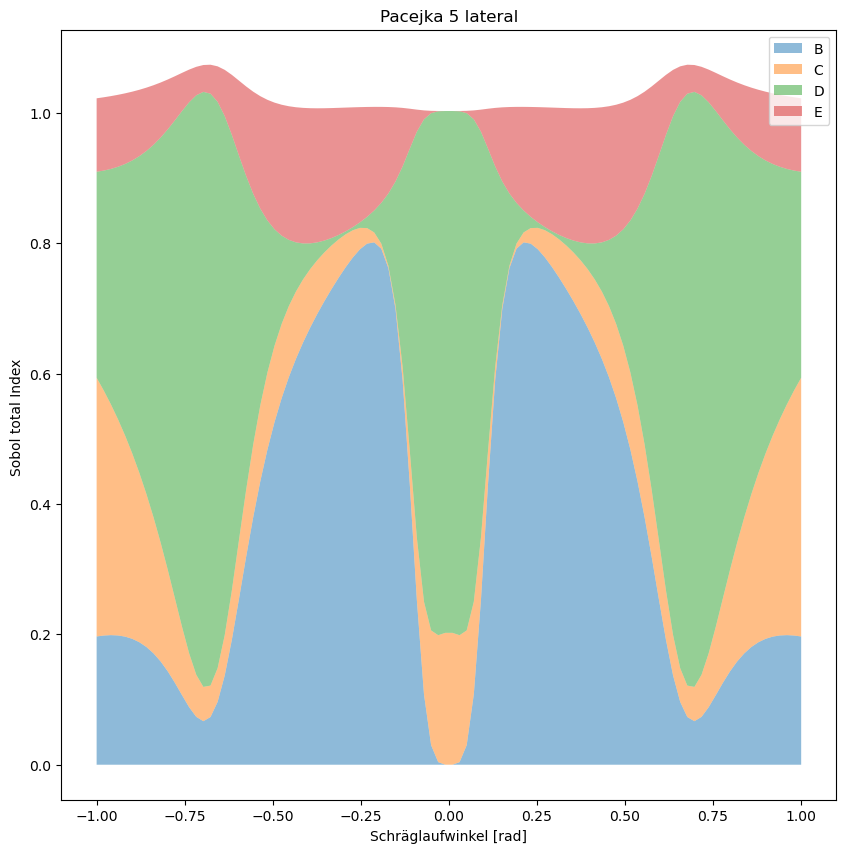

[0.35922425 0.10941805 0.3996781  0.10541798]
[0.37902819 0.12557894 0.40387187 0.11802762]


In [7]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

#function
def Pacejka5_lat(alpha,B,C,D,E):

    Fy= D * np.sin(C * np.arctan(D * alpha - E * (B*alpha - np.arctan(B * alpha)))) 
    
    return Fy
params_SA_Fy = [17.04378049,  1.99996234,  1.82504605,  0.62177794]
s=0.1
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[17.04378049 *(1-s),17.04378049*(1+s)], [1.99996234*(1-s), 1.99996234*(1+s)], [1.82504605*(1-s), 1.82504605*(1+s)], [0.62177794*(1-s), 0.62177794*(1+s)]],
})

alpha = np.linspace(-0.3,0.3,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, alpha=alpha):
    y = np.zeros((ab.shape[0], alpha.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_lat(alpha,B,C,D,E)

    return y

(
sp.sample_sobol(2**12)
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(10,10))
plt.fill_between(SL,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(SL,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()

STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(10,10))
plt.fill_between(SL,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(SL,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()


#Mean of Sensitvity indexes of first order index
# for ranking parameters on influence on the model output (direkter Einfluss auf die Ausgangsgröße)

S1_mean = np.zeros(4)
i=0
for i in range(0,4):
    S1_mean[i] = np.mean(S1s[:,i])


#Mean of Sensitvity indexes of total index
# includes first and all higher order index (berücksichtig Wechselwirkungseffekte zwischen den Parametern, wichtig für nicht-lineare Modelle)
ST_mean = np.zeros(4)
i=0
for i in range(0,4):
    ST_mean[i] = np.mean(STs[:,i])

print(S1_mean)
print(ST_mean)

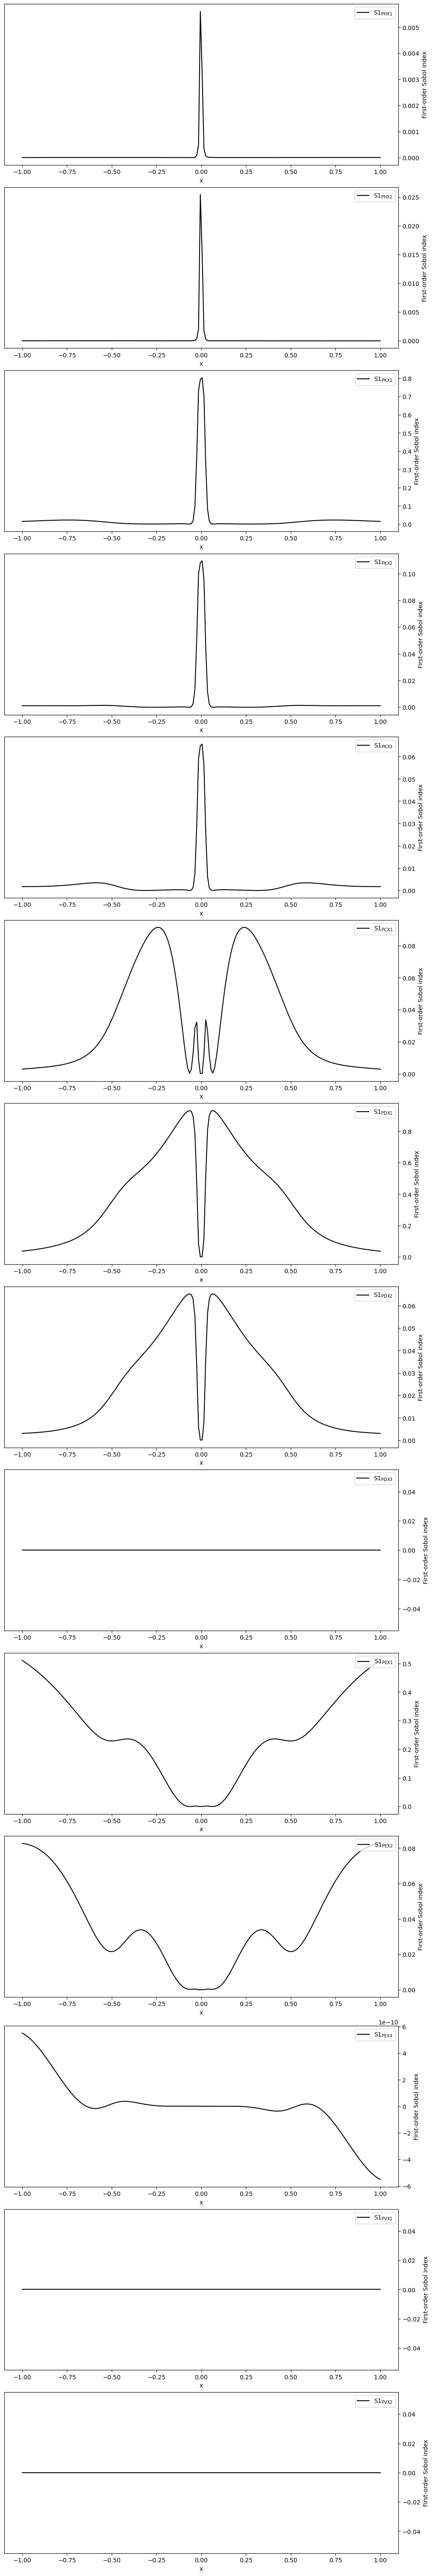

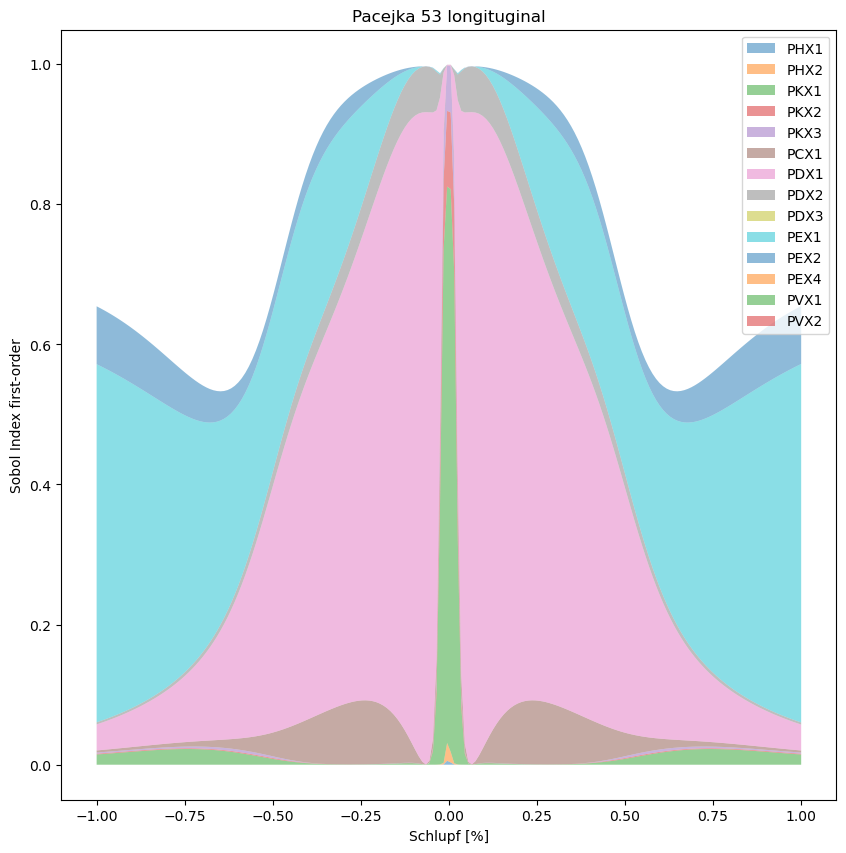

[ 4.93398113e-05  2.25685111e-04  2.97840100e-02  3.41814525e-03
  2.97085188e-03  3.33144837e-02  3.74242925e-01  2.48795590e-02
  0.00000000e+00  2.47891433e-01  3.78633115e-02 -3.47829868e-13
  0.00000000e+00  0.00000000e+00]
[4.98652013e-05 2.27867166e-04 5.90386324e-02 8.28130636e-03
 5.14559450e-03 8.10894708e-02 3.89570151e-01 2.72152268e-02
 0.00000000e+00 4.82542007e-01 2.30936227e-01 3.22488285e-16
 0.00000000e+00 0.00000000e+00]


In [8]:
##################################
#Pacejka 52 Params global SA
##################################

import Pacejka52_glSA as pa52

import Pacejka_Params_Indy as pa

s = 0.1

sp = ProblemSpec({
    'num_vars': 14,
    'names': ['PHX1', 'PHX2', 'PKX1', 'PKX2', 'PKX3', 'PCX1', 'PDX1', 'PDX2', 'PDX3', 'PEX1', 'PEX2', 'PEX4', 'PVX1', 'PVX2'],
    'bounds': [
    [-0.000638, -0.000522],
    [0.000711, 0.000869], 
    [57.375, 70.125], 
    [-16.5, -13.5],
    [0.2891 * 0.9, 0.2891 * 1.1],
    [2 * 0.9, 2 * 1.1],
    [1.7168 * 0.9, 1.7168 * 1.1],
    [-0.3179, -0.2601],
    [-1e-9, 1e-9],
    [0.6975 * 0.9, 0.6975 * 1.1],
    [0.20123 * 0.9, 0.20123 * 1.1],
    [-1e-9, 1e-9],
    [-1e-9, 1e-9],
    [-1e-9, 1e-9]
    ]
})

SL = np.linspace(-1,1,200)

# Create wrapper (runs each a, b combination separately)
i=0
def wrapped_function(ab, SL=SL):
    y = np.zeros((ab.shape[0], SL.shape[0]))
    for i, (PHX1, PHX2, PKX1, PKX2, PKX3, PCX1, PDX1, PDX2, PDX3, PEX1, PEX2, PEX4, PVX1, PVX2) in enumerate(ab):
        y[i,:] = pa52.Pacejka52_long(SL,PHX1, PHX2, PKX1, PKX2, PKX3, PCX1, PDX1, PDX2, PDX3, PEX1, PEX2, PEX4, PVX1, PVX2)[0]

    return y

(
sp.sample_sobol(2**12)
.evaluate(wrapped_function)
.analyze_sobol()
)


S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])
STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 60), constrained_layout=True)
gs = fig.add_gridspec(14, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[4, 0])
ax5 = fig.add_subplot(gs[5, 0])
ax6 = fig.add_subplot(gs[6, 0])
ax7 = fig.add_subplot(gs[7, 0])
ax8 = fig.add_subplot(gs[8, 0])
ax9 = fig.add_subplot(gs[9, 0])
ax10 = fig.add_subplot(gs[10, 0])
ax11 = fig.add_subplot(gs[11, 0])
ax12 = fig.add_subplot(gs[12, 0])
ax13 = fig.add_subplot(gs[13, 0])


# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#Mean of Sensitvity indexes of first order index
# for ranking parameters on influence on the model output (direkter Einfluss auf die Ausgangsgröße)

S1_mean = np.zeros(14)
i=0
for i in range(0,14):
    S1_mean[i] = np.mean(S1s[:,i])

#alle zusammen plotten
#PHX1, PHX2, PKX1, PKX2, PKX3, PCX1, PDX1, PDX2, PDX3, PEX1, PEX2, PEX4, PVX1, PVX2

S1s_PHX1  = np.array(S1s[:,0])
S1s_PHX2  = np.array(S1s[:,1])
S1s_PKX1  = np.array(S1s[:,2])
S1s_PKX2  = np.array(S1s[:,3])
S1s_PKX3 = np.array(S1s[:,4])
S1s_PCX1  = np.array(S1s[:,5])
S1s_PDX1 = np.array(S1s[:,6])
S1s_PDX2 = np.array(S1s[:,7])
S1s_PDX3 = np.array(S1s[:,8])
S1s_PEX1  = np.array(S1s[:,9])
S1s_PEX2 = np.array(S1s[:,10])
S1s_PEX4 = np.array(S1s[:,11])
S1s_PVX1 = np.array(S1s[:,12])
S1s_PVX2 = np.array(S1s[:,13])

S1s_PHX2_plt = np.array([x+y for x,y in zip(S1s_PHX1,S1s_PHX2)])
S1s_PKX1_plt = np.array([x+y for x,y in zip(S1s_PHX2_plt,S1s_PKX1)])
S1s_PKX2_plt = np.array([x+y for x,y in zip(S1s_PKX1_plt,S1s_PKX2)])
S1s_PKX3_plt = np.array([x+y for x,y in zip(S1s_PKX2_plt,S1s_PKX3)])
S1s_PCX1_plt = np.array([x+y for x,y in zip(S1s_PKX3_plt,S1s_PCX1)])
S1s_PDX1_plt = np.array([x+y for x,y in zip(S1s_PCX1_plt,S1s_PDX1)])
S1s_PDX2_plt = np.array([x+y for x,y in zip(S1s_PDX1_plt,S1s_PDX2)])
S1s_PDX3_plt = np.array([x+y for x,y in zip(S1s_PDX2_plt,S1s_PDX3)])
S1s_PEX1_plt = np.array([x+y for x,y in zip(S1s_PDX3_plt,S1s_PEX1)])
S1s_PEX2_plt = np.array([x+y for x,y in zip(S1s_PEX1_plt,S1s_PEX2)])
S1s_PEX4_plt = np.array([x+y for x,y in zip(S1s_PEX2_plt,S1s_PEX4)])
S1s_PVX1_plt = np.array([x+y for x,y in zip(S1s_PEX4_plt,S1s_PVX1)])
S1s_PVX2_plt = np.array([x+y for x,y in zip(S1s_PVX1_plt,S1s_PVX2)])


plt.figure(2, figsize=(10,10))
plt.fill_between(SL,S1s_PHX1,0, alpha=0.5, label = 'PHX1') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_PHX1,S1s_PHX2_plt, where = (S1s_PHX2_plt > S1s_PHX1), alpha=0.5, label = 'PHX2')
plt.fill_between(SL,S1s_PHX2_plt,S1s_PKX1_plt, where = (S1s_PKX1_plt > S1s_PHX2_plt), alpha=0.5, label = 'PKX1')
plt.fill_between(SL,S1s_PKX1_plt,S1s_PKX2_plt, where = (S1s_PKX2_plt > S1s_PKX1_plt), alpha=0.5, label = 'PKX2')
plt.fill_between(SL,S1s_PKX2_plt,S1s_PKX3_plt, where = (S1s_PKX3_plt > S1s_PKX2_plt), alpha=0.5, label = 'PKX3')
plt.fill_between(SL,S1s_PKX3_plt,S1s_PCX1_plt, where = (S1s_PCX1_plt > S1s_PKX3_plt), alpha=0.5, label = 'PCX1')
plt.fill_between(SL,S1s_PCX1_plt,S1s_PDX1_plt, where = (S1s_PDX1_plt > S1s_PCX1_plt), alpha=0.5, label = 'PDX1')
plt.fill_between(SL,S1s_PDX1_plt,S1s_PDX2_plt, where = (S1s_PDX2_plt > S1s_PDX1_plt), alpha=0.5, label = 'PDX2')
plt.fill_between(SL,S1s_PDX2_plt,S1s_PDX3_plt, where = (S1s_PDX3_plt > S1s_PDX2_plt), alpha=0.5, label = 'PDX3')
plt.fill_between(SL,S1s_PDX3_plt,S1s_PEX1_plt, where = (S1s_PEX1_plt > S1s_PDX3_plt), alpha=0.5, label = 'PEX1')
plt.fill_between(SL,S1s_PEX1_plt,S1s_PEX2_plt, where = (S1s_PEX2_plt > S1s_PEX1_plt), alpha=0.5, label = 'PEX2')
plt.fill_between(SL,S1s_PEX2_plt,S1s_PEX4_plt, where = (S1s_PEX4_plt > S1s_PEX2_plt), alpha=0.5, label = 'PEX4')
plt.fill_between(SL,S1s_PEX4_plt,S1s_PVX1_plt, where = (S1s_PVX1_plt > S1s_PEX4_plt), alpha=0.5, label = 'PVX1')
plt.fill_between(SL,S1s_PVX1_plt,S1s_PVX2_plt, where = (S1s_PVX2_plt > S1s_PVX1_plt), alpha=0.5, label = 'PVX2')

plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 53 longituginal')
plt.legend(loc='upper right')
plt.show()



#Mean of Sensitvity indexes of total index
# includes first and all higher order index (berücksichtig Wechselwirkungseffekte zwischen den Parametern, wichtig für nicht-lineare Modelle)
ST_mean = np.zeros(14)
i=0
for i in range(0,14):
    ST_mean[i] = np.mean(STs[:,i])

print(S1_mean)
print(ST_mean)

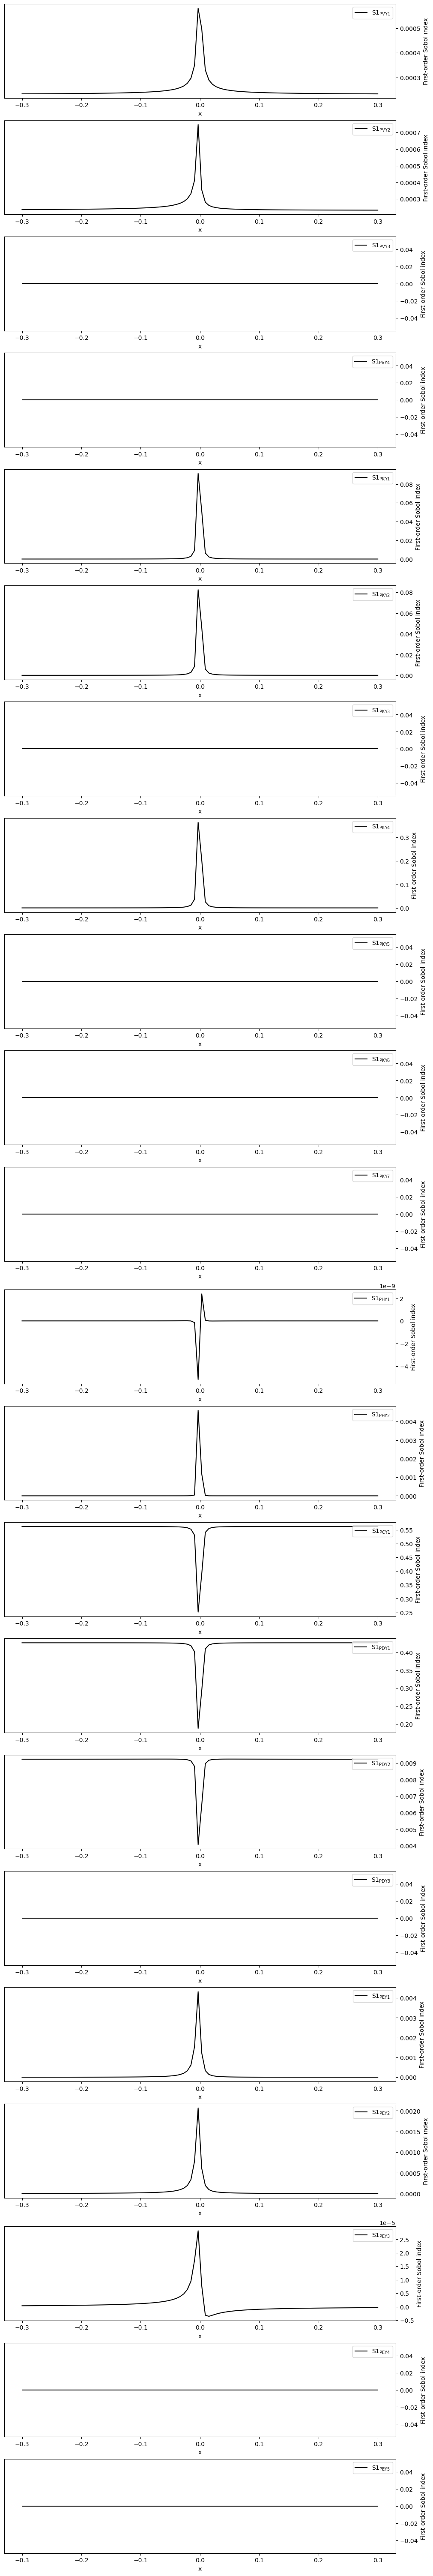

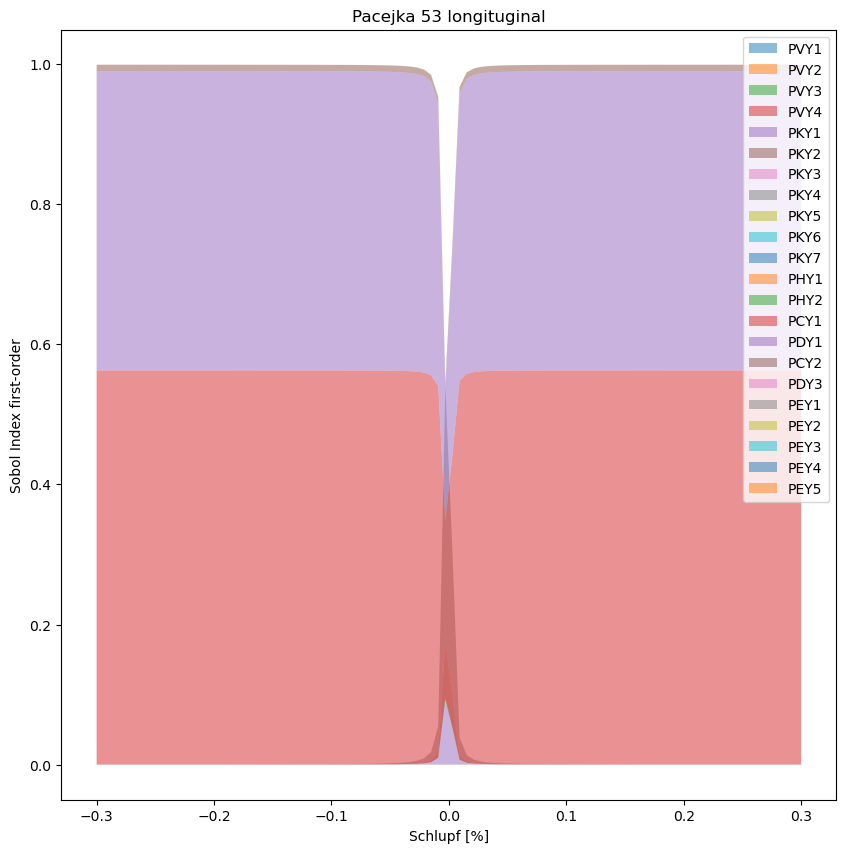

In [4]:
##################################
#Pacejka 52 Params global SA lateral
##################################

import Pacejka52_glSA as pa52
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec


import Pacejka_Params_Indy as pa

s = 0.1

sp = ProblemSpec({
    'num_vars': 22,
    'names': ['PVY1', 'PVY2', 'PVY3', 'PVY4', 'PKY1', 'PKY2', 'PKY3', 'PKY4', 'PKY5', 'PKY6', 'PKY7', 'PHY1', 'PHY2', 'PCY1', 'PDY1', 'PDY2', 'PDY3', 'PEY1', 'PEY2', 'PEY3', 'PEY4', 'PEY5'],
    'bounds': [
    [-0.01038 * (1 + s), -0.01038 * (1 - s)],
    [-0.1* (1 + s), -0.1* (1 - s)], 
    [0.4498* (1 - s), 0.4498* (1 + s)], 
    [-1.5* (1 + s), -1.5* (1 - s)],
    [-53.05* (1 + s), -53.05* (1 - s)],
    [4.1265* (1 - s), 4.1265* (1 + s)],
    [1.5016* (1 - s), 1.5016* (1 + s)],
    [-0.3179* (1 + s), -0.2601* (1 - s)],
    [2*(-1e-9), 2*(1e-9)],
    [-1e-9, 1e-9],
    [-1e-9, 1e-9],
    [-1e-9, 1e-9],
    [0.0039* (1 - s), 0.0039* (1 + s)],
    [-0.00253* (1 + s), -0.00253* (1 - s)],
    [1.603* (1 - s), 1.603* (1 + s)],
    [1.654* (1 - s), 1.654* (1 + s)],
    [-1e-9, 1e-9],
    [0.35475* (1 - s), 0.35475* (1 + s)],
    [-1.6617* (1 + s), -1.6617* (1 - s)],
    [0.26886* (1 - s), 0.26886* (1 + s)],
    [-13.61* (1 + s), -13.61* (1 - s)],
    [-1e-9, 1e-9]
    ]
})

SL = np.linspace(-0.3,0.3,100)

# Create wrapper (runs each a, b combination separately)
i=0
def wrapped_function(ab, SL=SL):
    y = np.zeros((ab.shape[0], SL.shape[0]))
    for i, (PVY1, PVY2, PVY3, PVY4, PKY1, PKY2, PKY3, PKY4, PKY5, PKY6, PKY7, PHY1, PHY2, PCY1, PDY1, PDY2, PDY3, PEY1, PEY2, PEY3, PEY4, PEY5) in enumerate(ab):
        y[i,:] = pa52.Pacejka52_lat(SL,PVY1, PVY2, PVY3, PVY4, PKY1, PKY2, PKY3, PKY4, PKY5, PKY6, PKY7, PHY1, PHY2, PCY1, PDY1, PDY2, PDY3, PEY1, PEY2, PEY3, PEY4, PEY5)[0]

    return y

(
sp.sample_sobol(2**11)
.evaluate(wrapped_function)
.analyze_sobol()
)


S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])
STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 60), constrained_layout=True)
gs = fig.add_gridspec(22, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[4, 0])
ax5 = fig.add_subplot(gs[5, 0])
ax6 = fig.add_subplot(gs[6, 0])
ax7 = fig.add_subplot(gs[7, 0])
ax8 = fig.add_subplot(gs[8, 0])
ax9 = fig.add_subplot(gs[9, 0])
ax10 = fig.add_subplot(gs[10, 0])
ax11 = fig.add_subplot(gs[11, 0])
ax12 = fig.add_subplot(gs[12, 0])
ax13 = fig.add_subplot(gs[13, 0])
ax14 = fig.add_subplot(gs[14, 0])
ax15 = fig.add_subplot(gs[15, 0])
ax16 = fig.add_subplot(gs[16, 0])
ax17 = fig.add_subplot(gs[17, 0])
ax18 = fig.add_subplot(gs[18, 0])
ax19 = fig.add_subplot(gs[19, 0])
ax20 = fig.add_subplot(gs[20, 0])
ax21 = fig.add_subplot(gs[21, 0])



# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20, ax21]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#Mean of Sensitvity indexes of first order index
# for ranking parameters on influence on the model output (direkter Einfluss auf die Ausgangsgröße)

#S1_mean = np.zeros(14)
#i=0
#for i in range(0,14):
#    S1_mean[i] = np.mean(S1s[:,i])

#alle zusammen plotten
#PVY1, PVY2, PVY3, PVY4, PKY1, PKY2, PKY3, PKY4, PKY5, PKY6, PKY7, PHY1, PHY2, PCY1, PDY1, PDY2, PDY3, PEY1, PEY2, PEY3, PEY4, PEY5

S1s_PVY1  = np.array(S1s[:,0])
S1s_PVY2  = np.array(S1s[:,1])
S1s_PVY3  = np.array(S1s[:,2])
S1s_PVY4  = np.array(S1s[:,3])
S1s_PKY1  = np.array(S1s[:,4])
S1s_PKY2  = np.array(S1s[:,5])
S1s_PKY3  = np.array(S1s[:,6])
S1s_PKY4  = np.array(S1s[:,7])
S1s_PKY5 = np.array(S1s[:,8])
S1s_PKY6 = np.array(S1s[:,9])
S1s_PKY7 = np.array(S1s[:,10])
S1s_PHY1 = np.array(S1s[:,11])
S1s_PHY2 = np.array(S1s[:,12])
S1s_PCY1 = np.array(S1s[:,13])
S1s_PDY1 = np.array(S1s[:,14])
S1s_PDY2 = np.array(S1s[:,15])
S1s_PDY3 = np.array(S1s[:,16])
S1s_PEY1 = np.array(S1s[:,17])
S1s_PEY2 = np.array(S1s[:,18])
S1s_PEY3 = np.array(S1s[:,19])
S1s_PEY4 = np.array(S1s[:,20])
S1s_PEY5 = np.array(S1s[:,21])


S1s_PVY2_plt = np.array([x+y for x,y in zip(S1s_PVY1,S1s_PVY2)])
S1s_PVY3_plt = np.array([x+y for x,y in zip(S1s_PVY2_plt,S1s_PVY3)])
S1s_PVY4_plt = np.array([x+y for x,y in zip(S1s_PVY3_plt,S1s_PVY4)])
S1s_PKY1_plt = np.array([x+y for x,y in zip(S1s_PVY4_plt,S1s_PKY1)])
S1s_PKY2_plt = np.array([x+y for x,y in zip(S1s_PKY1_plt,S1s_PKY2)])
S1s_PKY3_plt = np.array([x+y for x,y in zip(S1s_PKY2_plt,S1s_PKY3)])
S1s_PKY4_plt = np.array([x+y for x,y in zip(S1s_PKY3_plt,S1s_PKY4)])
S1s_PKY5_plt = np.array([x+y for x,y in zip(S1s_PKY4_plt,S1s_PKY5)])
S1s_PKY6_plt = np.array([x+y for x,y in zip(S1s_PKY5_plt,S1s_PKY6)])
S1s_PKY7_plt = np.array([x+y for x,y in zip(S1s_PKY6_plt,S1s_PKY7)])
S1s_PHY1_plt = np.array([x+y for x,y in zip(S1s_PKY1_plt,S1s_PHY1)])
S1s_PHY2_plt = np.array([x+y for x,y in zip(S1s_PHY1_plt,S1s_PHY2)])
S1s_PCY1_plt = np.array([x+y for x,y in zip(S1s_PHY2_plt,S1s_PCY1)])
S1s_PDY1_plt = np.array([x+y for x,y in zip(S1s_PCY1_plt,S1s_PDY1)])
S1s_PDY2_plt = np.array([x+y for x,y in zip(S1s_PDY1_plt,S1s_PDY2)])
S1s_PDY3_plt = np.array([x+y for x,y in zip(S1s_PDY2_plt,S1s_PDY3)])
S1s_PEY1_plt = np.array([x+y for x,y in zip(S1s_PDY3_plt,S1s_PEY1)])
S1s_PEY2_plt = np.array([x+y for x,y in zip(S1s_PEY1_plt,S1s_PEY2)])
S1s_PEY3_plt = np.array([x+y for x,y in zip(S1s_PEY2_plt,S1s_PEY3)])
S1s_PEY4_plt = np.array([x+y for x,y in zip(S1s_PEY3_plt,S1s_PEY4)])
S1s_PEY5_plt = np.array([x+y for x,y in zip(S1s_PEY4_plt,S1s_PEY5)])



plt.figure(2, figsize=(10,10))
plt.fill_between(SL,S1s_PVY1,0, alpha=0.5, label = 'PVY1') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_PVY1,S1s_PVY2_plt, where = (S1s_PVY2_plt > S1s_PVY1), alpha=0.5, label = 'PVY2')
plt.fill_between(SL,S1s_PVY2_plt,S1s_PVY3_plt, where = (S1s_PVY3_plt > S1s_PVY2_plt), alpha=0.5, label = 'PVY3')
plt.fill_between(SL,S1s_PVY3_plt,S1s_PVY4_plt, where = (S1s_PVY4_plt > S1s_PVY3_plt), alpha=0.5, label = 'PVY4')
plt.fill_between(SL,S1s_PVY4_plt,S1s_PKY1_plt, where = (S1s_PKY1_plt > S1s_PVY4_plt), alpha=0.5, label = 'PKY1')
plt.fill_between(SL,S1s_PKY1_plt,S1s_PKY2_plt, where = (S1s_PKY2_plt > S1s_PKY1_plt), alpha=0.5, label = 'PKY2')
plt.fill_between(SL,S1s_PKY2_plt,S1s_PKY3_plt, where = (S1s_PKY3_plt > S1s_PKY2_plt), alpha=0.5, label = 'PKY3')
plt.fill_between(SL,S1s_PKY3_plt,S1s_PKY4_plt, where = (S1s_PKY4_plt > S1s_PKY3_plt), alpha=0.5, label = 'PKY4')
plt.fill_between(SL,S1s_PKY4_plt,S1s_PKY5_plt, where = (S1s_PKY5_plt > S1s_PKY4_plt), alpha=0.5, label = 'PKY5')
plt.fill_between(SL,S1s_PKY5_plt,S1s_PKY6_plt, where = (S1s_PKY6_plt > S1s_PKY5_plt), alpha=0.5, label = 'PKY6')
plt.fill_between(SL,S1s_PKY6_plt,S1s_PKY7_plt, where = (S1s_PKY7_plt > S1s_PKY6_plt), alpha=0.5, label = 'PKY7')
plt.fill_between(SL,S1s_PKY7_plt,S1s_PHY1_plt, where = (S1s_PHY1_plt > S1s_PKY7_plt), alpha=0.5, label = 'PHY1')
plt.fill_between(SL,S1s_PHY1_plt,S1s_PHY2_plt, where = (S1s_PHY2_plt > S1s_PHY1_plt), alpha=0.5, label = 'PHY2')
plt.fill_between(SL,S1s_PHY2_plt,S1s_PCY1_plt, where = (S1s_PCY1_plt > S1s_PHY2_plt), alpha=0.5, label = 'PCY1')
plt.fill_between(SL,S1s_PCY1_plt,S1s_PDY1_plt, where = (S1s_PDY1_plt > S1s_PCY1_plt), alpha=0.5, label = 'PDY1')
plt.fill_between(SL,S1s_PDY1_plt,S1s_PDY2_plt, where = (S1s_PDY2_plt > S1s_PDY1_plt), alpha=0.5, label = 'PCY2')
plt.fill_between(SL,S1s_PDY2_plt,S1s_PDY3_plt, where = (S1s_PDY3_plt > S1s_PDY2_plt), alpha=0.5, label = 'PDY3')
plt.fill_between(SL,S1s_PDY3_plt,S1s_PEY1_plt, where = (S1s_PEY1_plt > S1s_PDY3_plt), alpha=0.5, label = 'PEY1')
plt.fill_between(SL,S1s_PEY1_plt,S1s_PEY2_plt, where = (S1s_PEY2_plt > S1s_PEY1_plt), alpha=0.5, label = 'PEY2')
plt.fill_between(SL,S1s_PEY2_plt,S1s_PEY3_plt, where = (S1s_PEY3_plt > S1s_PEY2_plt), alpha=0.5, label = 'PEY3')
plt.fill_between(SL,S1s_PEY3_plt,S1s_PEY4_plt, where = (S1s_PEY4_plt > S1s_PEY3_plt), alpha=0.5, label = 'PEY4')
plt.fill_between(SL,S1s_PEY4_plt,S1s_PEY5_plt, where = (S1s_PEY5_plt > S1s_PEY4_plt), alpha=0.5, label = 'PEY5')

plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 53 longituginal')
plt.legend(loc='upper right')
plt.show()




In [16]:
import 

[-0.2601, -0.3179]
